<a href="https://colab.research.google.com/github/AdaChen1130/Ecommerce-affecting-brickandmortar-retail/blob/main/Data_analysis_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction


#Literature

#Assumptions


#Return calculation

# Results

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Clear data


df = pd.read_excel('NBS_merged.xlsx')

df.fillna(0, inplace=True)
df.drop_duplicates(inplace=True)
df.drop('Oct 2023', axis=1, inplace=True)

df.to_excel('cleaned_data.xlsx', index=False)

print(df.head())


                                          Indicators  Sep 2023  Aug 2023  \
0  Total Retail Sales of Consumer Goods, Current ...   39826.0   37932.7   
1  Total Retail Sales of Consumer Goods, Growth R...       5.5       4.6   
2  Retail Sales of Consumer Goods of Enterprises ...   15890.3   14460.8   
3  Retail Sales of Consumer Goods of Enterprises ...       5.2       3.1   
4  Note:Figures of total retail sales of consumer...       0.0       0.0   

   Jul 2023  Jun 2023  May 2023  Apr 2023  Mar 2023  Feb 2023  Jan 2023  ...  \
0   36760.7   39951.4   37803.3   34910.5   37855.4       0.0       0.0  ...   
1       2.5       3.1      12.7      18.4      10.6       0.0       0.0  ...   
2   13762.0   16658.3   14033.4   13228.1   15459.1       0.0       0.0  ...   
3       0.3       2.3      12.5      19.0      10.1       0.0       0.0  ...   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0  ...   

   Oct 2019  Sep 2019  Aug 2019  Jul 2019  Jun 2019  May 2019 

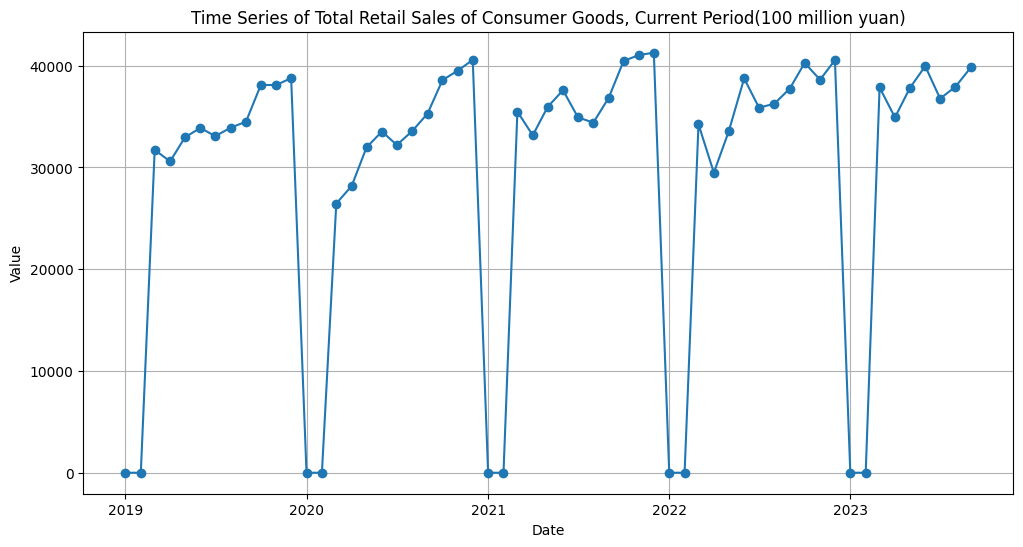

In [ ]:
# Transposing the dataset for easier plotting
data_transposed = df.set_index('Indicators').T
data_transposed.index = pd.to_datetime(data_transposed.index)

# Selecting an indicator for visualization
# Example: 'Total Retail Sales of Consumer Goods, Current Period(100 million yuan)'
indicator = 'Total Retail Sales of Consumer Goods, Current Period(100 million yuan)'

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data_transposed[indicator], marker='o')  # Added markers for clarity
plt.title(f'Time Series of {indicator}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


## Online Sales Pattern

In [ ]:
# Filter Online Sales
indicator = "Online Retail Sales in Goods, Accumulated(100 million yuan)"
online_sales_data = df[df['Indicators'] == indicator]

online_sales_data = online_sales_data.drop(columns=['Indicators']).T
online_sales_data.columns = ['Accumulated Sales']
online_sales_data.index.name = 'Month'
online_sales_data = online_sales_data[::-1]

# Convert to date
online_sales_data.index = pd.to_datetime(online_sales_data.index, errors='coerce')

In [ ]:
# Calculate diff from accumulated data
monthly_sales = online_sales_data['Accumulated Sales'].diff().fillna(online_sales_data['Accumulated Sales'])
monthly_sales[monthly_sales < 0] = online_sales_data['Accumulated Sales']

# Create line plot
fig = px.line(monthly_sales, labels={'value': 'Online Retail Sales (in 100 million yuan)', 'Month': 'Month'},
              title='Monthly Online Retail Sales in Goods')

fig.show()

# Save
# fig.write_image('monthly_online_retail_sales.png')


##In Store Sales Pattern

In [ ]:
# Filter Online Sales
indicator = "Online Retail Sales in Goods, Accumulated(100 million yuan)"
in_instore_sales_data = df[df['Indicators'] == indicator]

online_sales_data = online_sales_data.drop(columns=['Indicators']).T
online_sales_data.columns = ['Accumulated Sales']
online_sales_data.index.name = 'Month'
online_sales_data = online_sales_data[::-1]

# Convert to date
online_sales_data.index = pd.to_datetime(online_sales_data.index, errors='coerce')